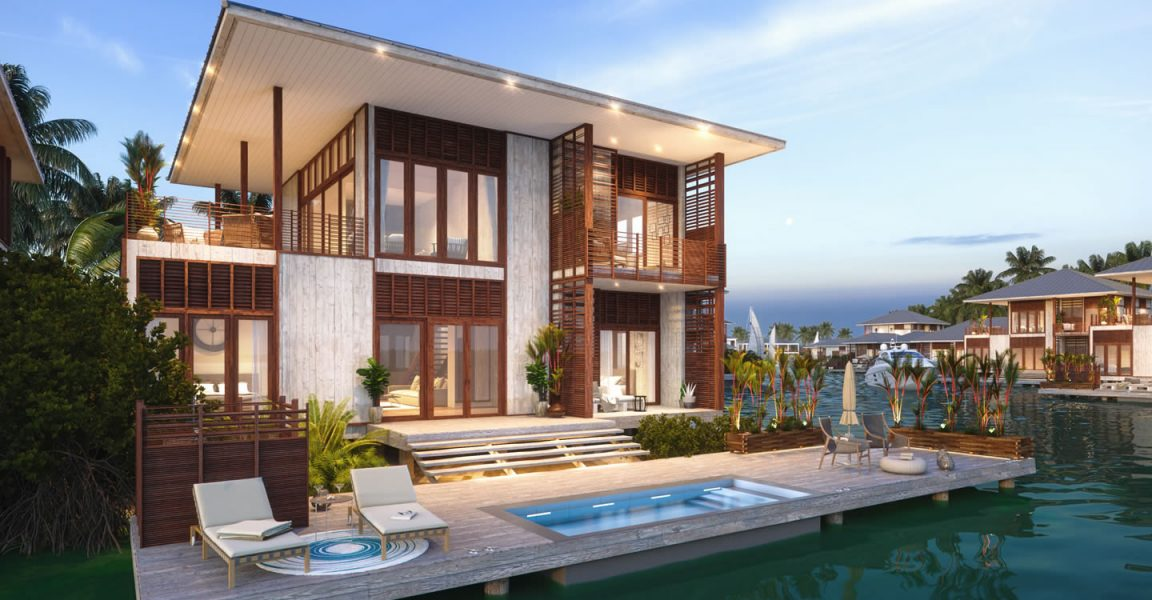

# Business Problem
______________________________________________________________________________________________________________________________

King County Realty is a newly established local business in Northwestern America. 
They are seeking some information regarding what attracts local buyers in this area to purchase new homes. 
We will inspect the data set to determine what relationships and connections buyers have to purchasing a home and help King County Realty market their new business to suit.

A linear regression model will be used to understand the connections to the business problem usingthe OSMIN Model to review our Data Science Process.

# Step 1: Read the dataset and inspect its columns and 5-point statistics

In [1]:
#Import packages
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from scipy import stats
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt 
from matplotlib.lines import Line2D
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from mpl_toolkits import mplot3d
import sklearn.metrics as metrics
import random
from math import sqrt
import seaborn as sns
plt.style.use('seaborn')

In [2]:
#Import data set
data = pd.read_csv('data\\kc_house_data.csv')

In [3]:
#review data types 
data.info

<bound method DataFrame.info of                id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  

In [4]:
#move null values 
data.dropna()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,...,8,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [5]:
#obtain stats details
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if int(x) == x else '{:,.2f}'.format(x)
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597,21597,21597,21597,21597,21597,21597,19221,21534,21597,21597,21597,21597,17755,21597,21597,21597,21597,21597
mean,"4,580,474,287.77","540,296.57",3.37,2.12,"2,080.32","15,099.41",1.49,0.01,0.23,3.41,7.66,"1,788.60","1,971.00",83.64,"98,077.95",47.56,-122.21,"1,986.62","12,758.28"
std,"2,876,735,715.75","367,368.14",0.93,0.77,918.11,"41,412.64",0.54,0.09,0.77,0.65,1.17,827.76,29.38,399.95,53.51,0.14,0.14,685.23,"27,274.44"
min,1000102,78000,1,0.50,370,520,1,0,0,1,3,370,1900,0,98001,47.16,-122.52,399,651
25%,2123049175,322000,3,1.75,1430,5040,1,0,0,3,7,1190,1951,0,98033,47.47,-122.33,1490,5100
50%,3904930410,450000,3,2.25,1910,7618,1.50,0,0,3,7,1560,1975,0,98065,47.57,-122.23,1840,7620
75%,7308900490,645000,4,2.50,2550,10685,2,0,0,4,8,2210,1997,0,98118,47.68,-122.12,2360,10083
max,9900000190,7700000,33,8,13540,1651359,3.50,1,4,5,13,9410,2015,2015,98199,47.78,-121.31,6210,871200


In [6]:
#drop unnecessary column data
data.drop(['id', 'date', 'waterfront', 'sqft_above', 'sqft_basement', 'lat', 'long', 'view', 'sqft_living15', 'sqft_lot15', 'yr_renovated'], axis=1, inplace=True)

In [7]:
data.nunique()

price          3622
bedrooms         12
bathrooms        29
sqft_living    1034
sqft_lot       9776
floors            6
condition         5
grade            11
yr_built        116
zipcode          70
dtype: int64

In [8]:
#Review specific correlated value estimated
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode
price,1,0.31,0.53,0.70,0.09,0.26,0.04,0.67,0.05,-0.05
bedrooms,0.31,1,0.51,0.58,0.03,0.18,0.03,0.36,0.16,-0.15
bathrooms,0.53,0.51,1,0.76,0.09,0.50,-0.13,0.67,0.51,-0.20
sqft_living,0.70,0.58,0.76,1,0.17,0.35,-0.06,0.76,0.32,-0.20
sqft_lot,0.09,0.03,0.09,0.17,1,-0.00,-0.01,0.11,0.05,-0.13
floors,0.26,0.18,0.50,0.35,-0.00,1,-0.26,0.46,0.49,-0.06
condition,0.04,0.03,-0.13,-0.06,-0.01,-0.26,1,-0.15,-0.36,0.00
grade,0.67,0.36,0.67,0.76,0.11,0.46,-0.15,1,0.45,-0.19
yr_built,0.05,0.16,0.51,0.32,0.05,0.49,-0.36,0.45,1,-0.35
zipcode,-0.05,-0.15,-0.20,-0.20,-0.13,-0.06,0.00,-0.19,-0.35,1


In [9]:
#view customised dataframe 
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode
0,221900,3,1,1180,5650,1,3,7,1955,98178
1,538000,3,2.25,2570,7242,2,3,7,1951,98125
2,180000,2,1,770,10000,1,3,6,1933,98028
3,604000,4,3,1960,5000,1,5,7,1965,98136
4,510000,3,2,1680,8080,1,3,8,1987,98074


# Describe Dataset: 

The data is comprised of 21597 rows and 21 columns. Above you will see a data frame that is free from null values and is ready for further analysis. I have nominated to keep the price, sqft_living, sqft_lot and grade to peform his analyis. Sqft_living and sqft_lot relate to the size of living room and the size of the lot itself. The grade is a special score that is given from the King County regarding the overall condition of the house which serves as an evaluation. The outliers have been left in the data and will likely skew or change the best line of fit. However we have opted to keep them in for the sake of obtaining factual details. 

# Step 2: Plot histograms with KDE Kernal Density Estimation overlay to check the distribution of the predictors 

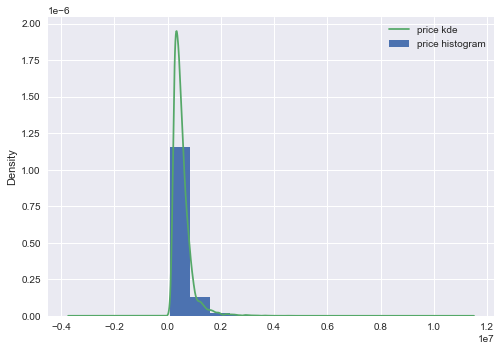

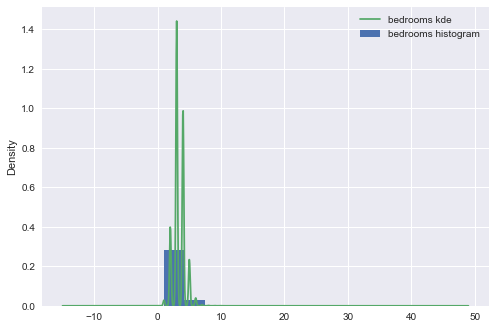

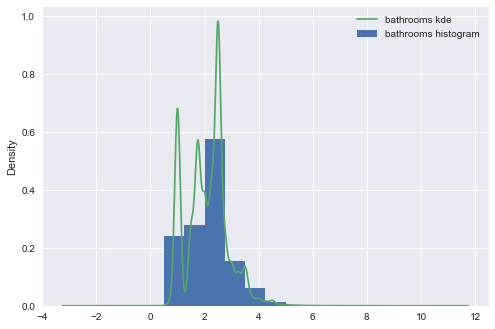

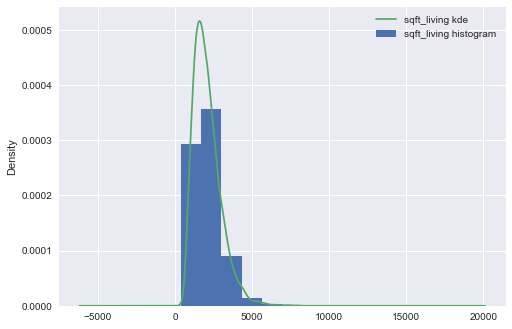

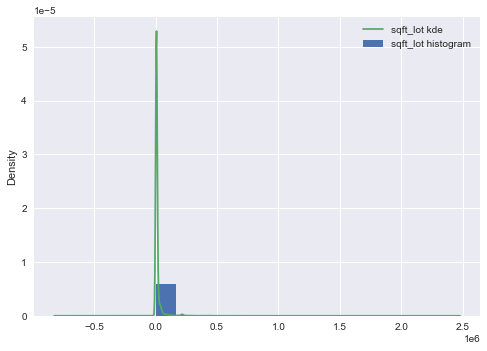

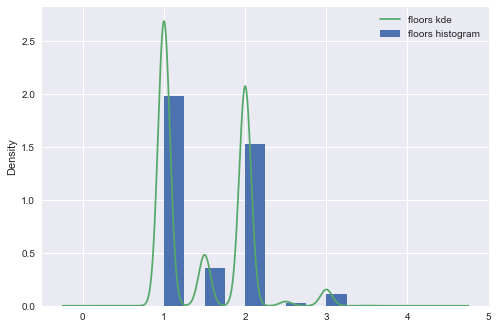

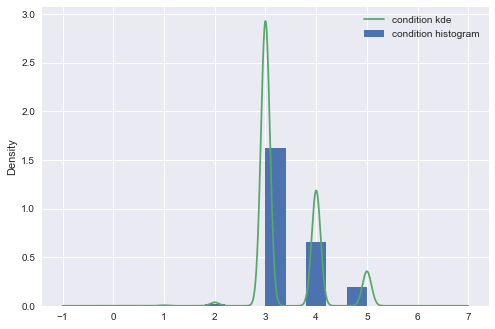

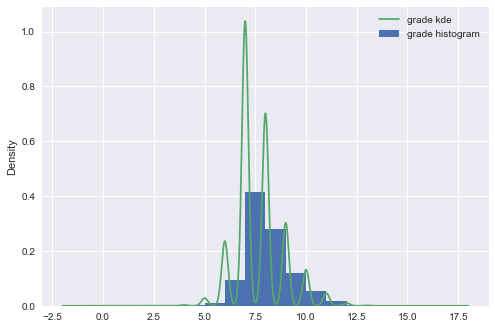

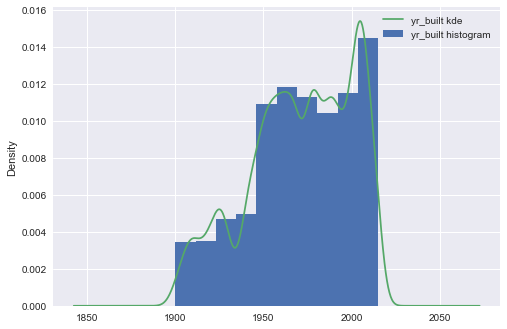

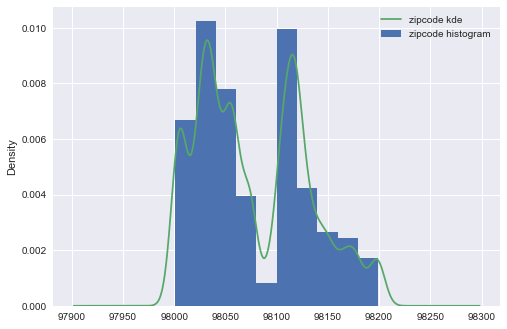

In [10]:
# For all the variables, check distribution by creating a histogram with kde
for column in data:
    data[column].plot.hist(density=True, label = column+' histogram')
    data[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

Descriptive Observations:  The closest normal pattern that I can see is related to the sqft_living and the grade. You will notice with the green line slope how it doesnt closely match the actual blue blocked histogram values from the dataset. I will pursue these two values in this regression model further.  

# Step 3: Test for the linearity assumption

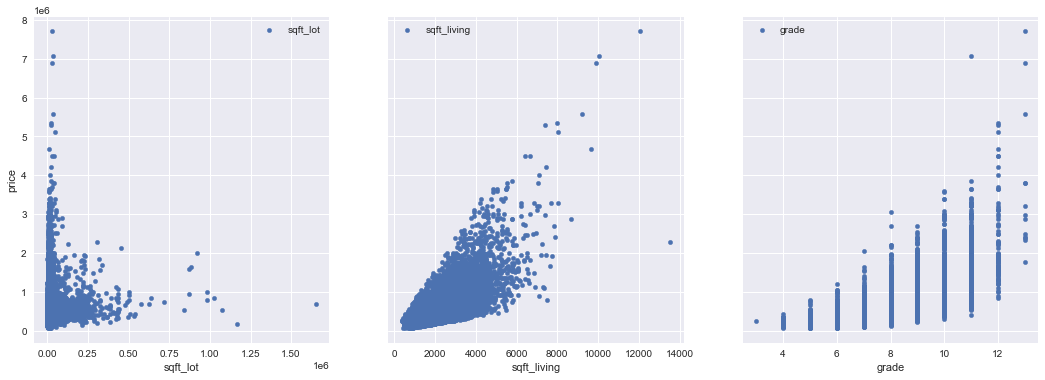

In [11]:
# visualize the relationship between the preditors and the target using scatterplots

fig, axs = plt.subplots(1, 3, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['sqft_lot', 'sqft_living', 'grade']):
    data.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

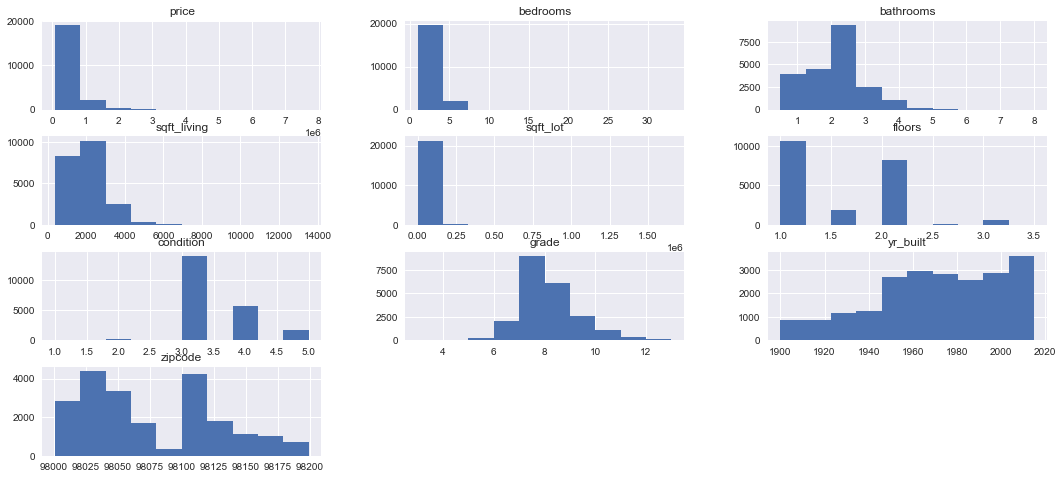

In [12]:
#Useful histogram to view any variances and understand the data set
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (18,8))
ax = fig.gca()
data.hist(ax = ax);

Descriptive Observations: As visualised in the KDE, the closest forms of linearity show in sqft_living verses the sqft_lot. Also the grade shows a strong discrete, yet categorical connection with a gradua increase aso depicting a possible linearity. 

# Step 4: Run a simple regression in Statsmodels with 'sqft_lot' as a predictor - TRANSFORMING 3 VARIABLES 

In [13]:
#OLS squared data representative of three variables to predict
outcome = 'price'
x_cols = ['grade', 'sqft_living', 'sqft_lot']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()

# Step 5: Get Regression Diagnostics Model Summary & RUN WITH LOG TRANSFORMATION 

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     8295.
Date:                Tue, 07 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:32:07   Log-Likelihood:            -2.9911e+05
No. Observations:               21597   AIC:                         5.982e+05
Df Residuals:                   21593   BIC:                         5.983e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.011e+05   1.33e+04    -45.074      0.000   -6.27e+05   -5.75e+05
grade        9.889e+04   2246.967     44.012      0.000    9.45e+04    1.03e+05
sqft_living   186.3532      2.896     64.344      0.000     180.676     192.030
sqft_lot       -0.2407      0.042     -5.760      0.000      -0.323      -0.159
==============================================================================
Omnibus:                    16895.228   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           991094.879
Skew:                           3.287   Prob(JB):                         0.00
Kurtosis:                      35.529   Cond. No.                     3.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Descriptive Observations here: The R squared value (Pearson correlaon coefficient squared) is .535. 
However as the notes above specify, it may indicate that there is strong multicollinearity. 
We will review and assess further ahead. 

# Step 6: #Draw a prediction line with data points on a scatter plot for X (sqft_living) and Y (Price)

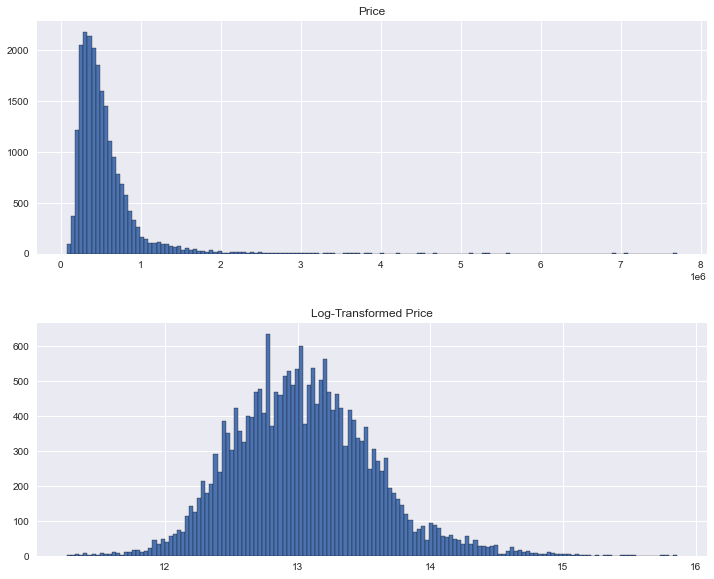

In [15]:
#Created log transformation visual 
X_log = np.log(data['price'])
X = data['price']

fig, ax = plt.subplots(2, 1, figsize=(10,8))
fig.tight_layout(h_pad=5)
grid = plt.GridSpec(2, 1, hspace=10)

ax[0].hist(X, bins=150, edgecolor = 'black')
ax[0].set_title("Price")
ax[1].hist(X_log, bins=150, edgecolor = 'black')
ax[1].set_title("Log-Transformed Price")
plt.show()

In [16]:
#price log tranform details
data_1 = data.drop(['price'], axis=1)
data_1['price'] = np.log(data['price'])
print(data_1)

       bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  grade  \
0             3          1         1180      5650       1          3      7   
1             3       2.25         2570      7242       2          3      7   
2             2          1          770     10000       1          3      6   
3             4          3         1960      5000       1          5      7   
4             3          2         1680      8080       1          3      8   
...         ...        ...          ...       ...     ...        ...    ...   
21592         3       2.50         1530      1131       3          3      8   
21593         4       2.50         2310      5813       2          3      8   
21594         2       0.75         1020      1350       2          3      7   
21595         3       2.50         1600      2388       2          3      8   
21596         2       0.75         1020      1076       2          3      7   

       yr_built  zipcode  price  
0          1955  

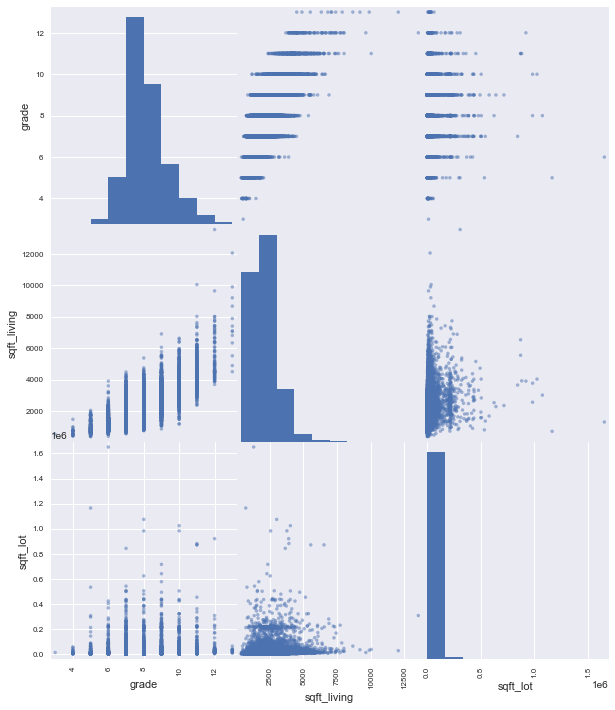

In [17]:
#visualising matrices
pd.plotting.scatter_matrix(data[x_cols], figsize=(10,12));

# Decriptive Observations: 

The above conveys that there is a strong linear regression here to begin with. The red line indicating best line of fit  mapping the continuous correlation is not in alignment with the data across the span of pricing data.  

# Step 7: Visualize the error term for variance and heteroscedasticity

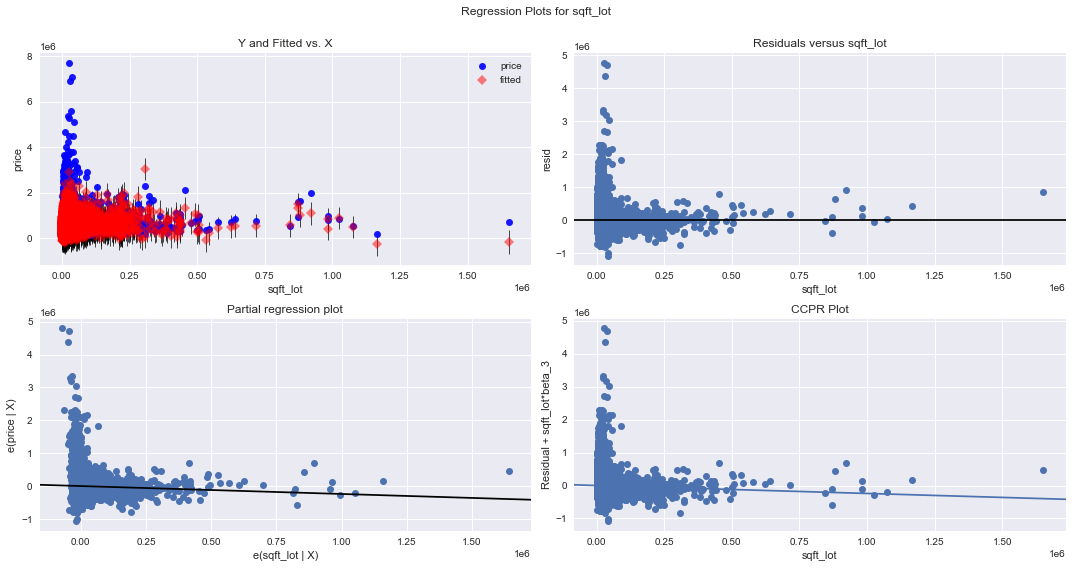

In [18]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_lot", fig=fig)
plt.show()

 Record Your observations on heteroscedasticity

 From the first and second plot in the first row, we see a cone-shape which is a sign of heteroscedasticity. 
 Ideally we are looking for homodsacticity where the scatter plot is distributed across the best line of fit. The visualisation below from the QQ Plot confirms that the best line of fit drops off after some time and does not remain continuous. Determining that sqft_livig starts to as a strong cnnection however is not consistent with this dataset.  

# Step 8: Check the normality assumptions by creating a QQ-plot

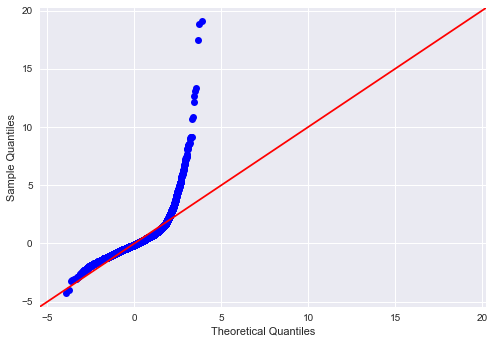

In [19]:
# Code for QQ-plot here
import scipy.stats as stats
residuals = model.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

Descriptive Observations: Here we can see that grade also has a strong best fit to start, however does not maintain continuously to gradually increase with the red line or best line of fit, as determined in the QQ plot above.

Descriptive Observation: The grade OLS R squared value has slightly decreased, indicating that this is even less of a correlation or is less favourable with a connection to the house sales price. 

Advise of the final analysis

(2) Two features that have strong relationships with housing prices:

Sqft_living had the strongest linearity compared to sqft_lot which would be a resaonably strong connection to house sales in the area. For example, the larger the lot the higher the price. This theory proved to be incorrect. The larger the sqft_living area was directly correlated with the increased house sales price, but to a certain point. I believe that the outliers played a certain part in this analysis, and I debated to remove teh outliers from this test. However, I felt that the data should remain in this dataset to ensure transparency and depict a true accurate model. 

In Summary this dataset was very interesting.

First steps performed was leaning and prepping data to take a deeper dive in the data set. Through a correlation analysis we could see that the strongest correlations were amongst the sqft_living, grade, and sqft_lot. 

When compared to other variables found that the grade which also had a close level of correlation also diplayed a level of gradual increase over time. Meaning that the quality or grade of the home, also correlated to the increase of the sale price.However through further analysis we determined that this was only so to a point. 

I have determined that the sqft_living does not affect the amount of sales or increase of house sales price King County area in the presence of high outliers. It shows a strong correlation, definately not causation. The steps modelled in this notebook replicated for the continuous variables measured which were sqft_living, sqft_lot and grade (whch appeared to be both categorical and continuous based on the data visualisations observed). 
When we further compared this knowledge after researching some websites on how sqft_lot size impacts the sales of house, we found that the connection was very low.

In summary, I am stating there are many determining factors as to why a person purchases a home, perhaps it is the way they feel on that day, that the house is positioned in an area that makes them feel something special, or that they like to be closer to schools and shops for instance. This data is outside the scope of the data set however would have surprising insights to extract and report on. However sqft_living with the strongest correlation, has a low chance of affecting the buyer as a strong influenmcer to purchase a home. 

3 important parameter estimates or statistics found through the data

Sqft_living R squared value square = 0.493
Grade OLS R squared value = 0.446


In [20]:
#declaring categorical dummy data 
#create the column data
continuous = ['price', 'sqft_lot', 'sqft_living']
categoricals = ['bedrooms', 'bathrooms', 'floors', 'condition','yr_built', 'zipcode', 'grade']
data_cont = data[continuous]

In [21]:
# log features declared with lamda values to convert int to floats 
log_names = [f'{column}_log' for column in data_cont.columns]
data_log = np.log(data_cont)
data_log.columns = log_names

In [22]:
# normalize continued features
def normalize(feature):
    return (feature - feature.mean()) / feature.std()
data_log_norm = data_log.apply(normalize)

In [23]:
#creating dummy data categorical data
pd.get_dummies(data)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode
0,221900,3,1,1180,5650,1,3,7,1955,98178
1,538000,3,2.25,2570,7242,2,3,7,1951,98125
2,180000,2,1,770,10000,1,3,6,1933,98028
3,604000,4,3,1960,5000,1,5,7,1965,98136
4,510000,3,2,1680,8080,1,3,8,1987,98074
...,...,...,...,...,...,...,...,...,...,...
21592,360000,3,2.50,1530,1131,3,3,8,2009,98103
21593,400000,4,2.50,2310,5813,2,3,8,2014,98146
21594,402101,2,0.75,1020,1350,2,3,7,2009,98144
21595,400000,3,2.50,1600,2388,2,3,8,2004,98027


In [24]:
#data_cont = data[continuous]
data_ohe = pd.get_dummies(data[categoricals], drop_first=True)
#pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if int(x) == x else '{:,.2f}'.format(x)

In [25]:
#combining two variables
preprocessed = pd.concat([data_log_norm, data_ohe], axis=1)
preprocessed.head()

,price_log,sqft_lot_log,sqft_living_log,bedrooms,bathrooms,floors,condition,yr_built,zipcode,grade
0,-1.40,-0.39,-1.13,3,1,1,3,1955,98178,7
1,0.28,-0.11,0.71,3,2.25,2,3,1951,98125,7
2,-1.80,0.24,-2.13,2,1,1,3,1933,98028,6
3,0.50,-0.52,0.07,4,3,1,5,1965,98136,7
4,0.18,0.01,-0.29,3,2,1,3,1987,98074,8


In [26]:
# one hot encode (ohe)categoricals
#data_ohe = pd.get_dummies(data[categoricals], prefix=categoricals[0], drop_first=True)
#preprocessed = pd.concat([data_log_norm, data_ohe], axis=1)
X = preprocessed.drop('grade', axis=1)
y = preprocessed['grade']

# SPLIT DATA INTO TEST & TRAINING SET 

In [27]:
# Split the data into training and test sets (assign 20% to test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [28]:
# A brief preview of train-test split to create test training data and dummy data set
print(len(X_train), len(X_test), len(y_train), len(y_test))

17277 4320 17277 4320


In [29]:
#apply model to the train set 
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_test = linreg.predict(X_test)

In [30]:
#calculate training and test MSE
from sklearn.metrics import mean_squared_error
test_residuals = y_hat_test - y_test
test_mse = mean_squared_error(y_test, y_hat_test)
test_mse

0.4047792099340016

In [31]:
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
mse = make_scorer(mean_squared_error)
cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring=mse)

In [32]:
cv_5_results.mean()

0.3986158452807703

In [33]:
mlr = smf.ols(formula="price ~ sqft_living + sqft_lot", data=data).fit()
print(mlr.params)

Intercept     -44,331.93
sqft_living       283.14
sqft_lot           -0.29
dtype: float64


In [34]:
#stipulating x & y variables
X = preprocessed.drop('price_log', axis=1)
y = preprocessed['price_log']

In [35]:
#OLS squared data representative of three variables to predict
outcome = 'price'
x_cols = ['grade', 'sqft_living', 'sqft_lot']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     8295.
Date:                Tue, 07 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:32:10   Log-Likelihood:            -2.9911e+05
No. Observations:               21597   AIC:                         5.982e+05
Df Residuals:                   21593   BIC:                         5.983e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.011e+05   1.33e+04    -45.074      0.000   -6.27e+05   -5.75e+05
grade        9.889e+04   2246.967     44.012      0.000    9.45e+04    1.03e+05
sqft_living   186.3532      2.896     64.344      0.000     180.676     192.030
sqft_lot       -0.2407      0.042     -5.760      0.000      -0.323      -0.159
==============================================================================
Omnibus:                    16895.228   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           991094.879
Skew:                           3.287   Prob(JB):                         0.00
Kurtosis:                      35.529   Cond. No.                     3.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
#Predicting data values 
data_preds = data.drop('price', axis=1)
data_target = data['price']
data_preds.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode
0,3,1,1180,5650,1,3,7,1955,98178
1,3,2.25,2570,7242,2,3,7,1951,98125
2,2,1,770,10000,1,3,6,1933,98028
3,4,3,1960,5000,1,5,7,1965,98136
4,3,2,1680,8080,1,3,8,1987,98074


In [37]:
#use sm,add_constant() to add constant term/y-intercept
#optimise betas adding another predictor intercept term = bo x const
predictors = sm.add_constant(data_preds)
predictors

,const,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode
0,1,3,1,1180,5650,1,3,7,1955,98178
1,1,3,2.25,2570,7242,2,3,7,1951,98125
2,1,2,1,770,10000,1,3,6,1933,98028
3,1,4,3,1960,5000,1,5,7,1965,98136
4,1,3,2,1680,8080,1,3,8,1987,98074
...,...,...,...,...,...,...,...,...,...,...
21592,1,3,2.50,1530,1131,3,3,8,2009,98103
21593,1,4,2.50,2310,5813,2,3,8,2014,98146
21594,1,2,0.75,1020,1350,2,3,7,2009,98144
21595,1,3,2.50,1600,2388,2,3,8,2004,98027


In [38]:
#model target predictors 
model = sm.OLS(data_target, predictors).fit()
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if int(x) == x else '{:,.2f}'.format(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     3880.
Date:                Tue, 07 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:32:10   Log-Likelihood:            -2.9700e+05
No. Observations:               21597   AIC:                         5.940e+05
Df Residuals:                   21587   BIC:                         5.941e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.328e+04   3.17e+06      0.023      0.982   -6.15e+06     6.3e+06
bedrooms    -4.886e+04   2127.161    -22.967      0.000    -5.3e+04   -4.47e+04
bathrooms    5.263e+04   3588.968     14.664      0.000    4.56e+04    5.97e+04
sqft_living   187.8342      3.426     54.824      0.000     181.119     194.550
sqft_lot       -0.2377      0.038     -6.194      0.000      -0.313      -0.162
floors       2.028e+04   3621.615      5.599      0.000    1.32e+04    2.74e+04
condition    2.028e+04   2601.136      7.795      0.000    1.52e+04    2.54e+04
grade        1.311e+05   2238.651     58.560      0.000    1.27e+05    1.35e+05
yr_built    -3954.9216     73.722    -53.647      0.000   -4099.422   -3810.422
zipcode        69.5884     31.814      2.187      0.029       7.231     131.946
==============================================================================
Omnibus:                    17321.831   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1210280.235
Skew:                           3.359   Prob(JB):                         0.00
Kurtosis:                      39.053   Cond. No.                     2.04e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
data_preds_scaled = (data_preds - np.mean(data_preds))/np.std(data_preds)
#pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if int(x) == x else '{:,.2f}'.format(x)


In [40]:
data_preds_scaled.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode
count,21597,21597,21597,21597,21597,21597,21597,21597,21597
mean,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.56,-2.10,-1.86,-0.35,-0.92,-3.70,-3.97,-2.42,-1.44
25%,-0.40,-0.48,-0.71,-0.24,-0.92,-0.63,-0.56,-0.68,-0.84
50%,-0.40,0.17,-0.19,-0.18,0.01,-0.63,-0.56,0.14,-0.24
75%,0.68,0.50,0.51,-0.11,0.94,0.91,0.29,0.89,0.75
max,31.98,7.65,12.48,39.51,3.72,2.44,4.55,1.50,2.26


In [41]:
predictors = sm.add_constant(data_preds_scaled)
model = sm.OLS(data_target, predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     3880.
Date:                Tue, 07 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:32:10   Log-Likelihood:            -2.9700e+05
No. Observations:               21597   AIC:                         5.940e+05
Df Residuals:                   21587   BIC:                         5.941e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.403e+05   1545.416    349.612      0.000    5.37e+05    5.43e+05
bedrooms    -4.525e+04   1970.341    -22.967      0.000   -4.91e+04   -4.14e+04
bathrooms    4.047e+04   2759.796     14.664      0.000    3.51e+04    4.59e+04
sqft_living  1.724e+05   3145.471     54.824      0.000    1.66e+05    1.79e+05
sqft_lot    -9844.1900   1589.325     -6.194      0.000    -1.3e+04   -6728.996
floors       1.094e+04   1954.478      5.599      0.000    7111.314    1.48e+04
condition    1.319e+04   1692.118      7.795      0.000    9874.150    1.65e+04
grade        1.538e+05   2626.324     58.560      0.000    1.49e+05    1.59e+05
yr_built    -1.162e+05   2165.543    -53.647      0.000    -1.2e+05   -1.12e+05
zipcode      3723.8038   1702.419      2.187      0.029     386.936    7060.672
==============================================================================
Omnibus:                    17321.831   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1210280.235
Skew:                           3.359   Prob(JB):                         0.00
Kurtosis:                      39.053   Cond. No.                         4.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
#Transforming dataset 
ss = StandardScaler()
ss.fit(data_preds)
data_preds_st_scaled = ss.transform(data_preds_scaled)

In [43]:
#preview the predicted df
data_preds_scaled.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode
0,-0.40,-1.45,-0.98,-0.23,-0.92,-0.63,-0.56,-0.54,1.87
1,-0.40,0.17,0.53,-0.19,0.94,-0.63,-0.56,-0.68,0.88
2,-1.48,-1.45,-1.43,-0.12,-0.92,-0.63,-1.41,-1.29,-0.93
3,0.68,1.15,-0.13,-0.24,-0.92,2.44,-0.56,-0.20,1.08
4,-0.40,-0.15,-0.44,-0.17,-0.92,-0.63,0.29,0.54,-0.07


In [44]:
#boolean value declared
np.allclose(data_preds_st_scaled, data_preds_scaled)

False

In [45]:
#obtaining statistic values of target mean
data_target.mean()

540296.5735055795

In [46]:
#created array 
data_preds_st_scaled[:5, :]

array([[-4.07664356e+00, -4.63856226e+00, -2.26700447e+00,
        -3.64622677e-01, -4.46503867e+00, -6.21002614e+00,
        -7.00554752e+00, -6.71174225e+01, -1.83279241e+03],
       [-4.07664356e+00, -2.52460998e+00, -2.26535536e+00,
        -3.64621749e-01, -1.03149188e+00, -6.21002614e+00,
        -7.00554752e+00, -6.71220582e+01, -1.83281092e+03],
       [-5.24215843e+00, -4.63856226e+00, -2.26749090e+00,
        -3.64620141e-01, -4.46503867e+00, -6.21002614e+00,
        -7.73211549e+00, -6.71429189e+01, -1.83284479e+03],
       [-2.91112870e+00, -1.25623861e+00, -2.26607907e+00,
        -3.64623056e-01, -4.46503867e+00, -1.48401687e+00,
        -7.00554752e+00, -6.71058332e+01, -1.83280708e+03],
       [-4.07664356e+00, -2.94740043e+00, -2.26641127e+00,
        -3.64621260e-01, -4.46503867e+00, -6.21002614e+00,
        -6.27897955e+00, -6.70803367e+01, -1.83282873e+03]])

# DETERMINING MODEL FIT IN LINEAR REGRESSION

In [47]:
#confirm mlr to run
mlr = LinearRegression()
mlr.fit(data_preds_st_scaled, data_target)

LinearRegression()

In [48]:
#setting co-efficient array 
mlr.coef_

array([-4.19174557e+04,  3.11190790e+04,  1.58321622e+08, -4.07664426e+08,
        5.90519890e+03,  8.58103632e+03,  1.80431342e+05, -3.41256111e+06,
        1.99267568e+05])

In [49]:
#calculating intercept data value 
mlr.intercept_

348061654.01133776

In [50]:
#calculating linear regression score 
mlr.score(data_preds_st_scaled, data_target)

0.6179675998938288

In [51]:
#validating though y^test
y_hat = mlr.predict(data_preds_st_scaled)
y_hat

array([298603.03598171, 657505.59607589, 214886.76505136, ...,
       109614.32152653, 404282.31094038, 113634.37707627])

In [52]:
#find values for array 
data_preds_st_scaled.shape

(21597, 9)

In [53]:
#staged array
base_pred = np.zeros(9).reshape(1, -1)
base_pred

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [54]:
#predicted array
mlr.predict(base_pred)

array([3.48061654e+08])

In [55]:
#overall metrics predicted data target metric to be .619 or 62%
metrics.r2_score(data_target, mlr.predict(data_preds_st_scaled))

0.6179675998938288

In [56]:
#setting predictors location  
data_pred = data.iloc[:,0:12]
data_pred.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode
0,221900,3,1,1180,5650,1,3,7,1955,98178
1,538000,3,2.25,2570,7242,2,3,7,1951,98125
2,180000,2,1,770,10000,1,3,6,1933,98028
3,604000,4,3,1960,5000,1,5,7,1965,98136
4,510000,3,2,1680,8080,1,3,8,1987,98074


In [57]:
#visualse value of correlation percentage 
data_pred.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode
price,1,0.31,0.53,0.70,0.09,0.26,0.04,0.67,0.05,-0.05
bedrooms,0.31,1,0.51,0.58,0.03,0.18,0.03,0.36,0.16,-0.15
bathrooms,0.53,0.51,1,0.76,0.09,0.50,-0.13,0.67,0.51,-0.20
sqft_living,0.70,0.58,0.76,1,0.17,0.35,-0.06,0.76,0.32,-0.20
sqft_lot,0.09,0.03,0.09,0.17,1,-0.00,-0.01,0.11,0.05,-0.13
floors,0.26,0.18,0.50,0.35,-0.00,1,-0.26,0.46,0.49,-0.06
condition,0.04,0.03,-0.13,-0.06,-0.01,-0.26,1,-0.15,-0.36,0.00
grade,0.67,0.36,0.67,0.76,0.11,0.46,-0.15,1,0.45,-0.19
yr_built,0.05,0.16,0.51,0.32,0.05,0.49,-0.36,0.45,1,-0.35
zipcode,-0.05,-0.15,-0.20,-0.20,-0.13,-0.06,0.00,-0.19,-0.35,1


# FINAL EVALUATION 

(2) Two features that have strong relationships with housing prices:

1.Sqft_living had the strongest linearity compared to sqft_lot which would be a resaonably strong connection to house sales in the area. For example, the larger the lot the higher the price. 
Details in the model proved otherwise. Rather the larger the sqft_lot area directly correlated with the increased house sale price.
2. 


In Summary this dataset was very interesting. I have determined that the sqft_living does not affect the amount of sales or increase of house sales price King County area. The next step was taking a deeper dive in the data set to shape, clean and prep for deeper analysis. From there we were then able to confirm that there was a R squared 62% effective qualitative score of targeted predictors. 

When compared to other variables found that the grade which also had a close level of correlation also diplayed a level of gradual increase over time. Meaning that the quality or garde of the home, also correlated to the increase of the sale price.

When we further compared this knowledge after researching some websites on how sqft_lot size impacts the sales of house, we found that the connection was very low.In summary, we are safe to say that there are many determining factors as to why a person purchases a home.

3 important parameter estimates or statistics found through the data

COMBINED R squared value square = 0.535
Grade OLS R squared value = 0.446
Pre Processed dummy data predicts price_log at an R squared value of 0.636 with a linear regression prediction array of (540308)
R2 SCORE 0.619

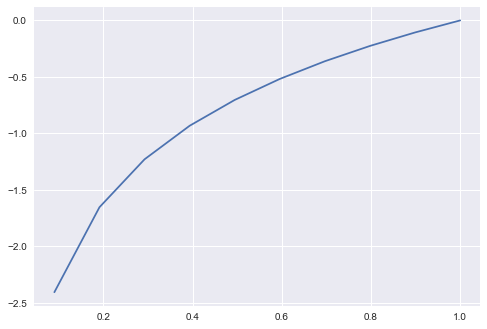

In [58]:
#Log trandsformation visual representation 
x = np.linspace(start=-100, stop=1, num=10**3)
y = np.log(x)
plt.plot(x, y);